# Data and Network Security / Homework Basic Security

## HomeWork 3

### Ravi Sivaraman

### Collaboration with Apurv Mittal

## Exercise 1 : UNIX Password Cracker
The goal of this exercise is to write a password cracker for the UNIX file s ystem. U NIX s tores a ll p asswords i n t he file `/etc/passwd`. Well, it doesn’t store the password itself. Instead, it stores a signature of the password by using the password to encrypt a block of zero bits prepended by a salt value with a one-way function called crypt( ). The result of the crypt( ) function is stored in the `/etc/passwd` file. For example, for a password of “egg” and salt equal to `HX`, the function crypt(‘egg’,‘HX’) returns `HX9LLTdc/jiDE`.

When you try to log in, the program /bin/login takes the password that you typed, uses crypt( ) to encrypt a block of zero bits, and compares the result of this function with the value stored in the `/etc/passwd` file.
The security of this approach rests on both the strength of the crypt( ) function and the difficulty i n g uessing a user’s password. The crypt( ) algorithm has proven to be highly resistant to attacks. Conversely, the user’s choices for passwords have been found to be relatively easy to guess, with many passwords being words contained in the dictionary.

TowriteourUNIXpasswordcracker,wewillneedtousethecrypt( )algorithmthathashesUNIXpasswords.Fortunately, the crypt library already exists in the Python 2.79 standard library (on UNIX-based operating systems). (Note: for Windows- based operating systems, you will need to find the correct way t o i mport t he UNIX c rypt() a lgorithm.) T o c alculate the encrypted UNIX password signature, we simply call the function crypt.cypt( ) and pass it the password and salt as parameters. This function returns the signature as a string.
A simple dictionary attack involves computing the possible signatures generated for each word in the dictionary with a range of salt values.

Let’s create our first password cracker using a dictionary attack.


#### 1. Create a file called cracker.py. Start your program by reading in the HW2-passwords.txt file and, for each password found in the file, iterate through each dictionary word found in the HW2-dictionary.txt file and appropriate salt value.

Report out the password found, if any, for each user. If no password is found, indicate that no password was found.

In [1]:
import crypt
passwd_file = open('/Users/ravisivaraman/Downloads/HW3passwords.txt', 'r')
passwd_lines = passwd_file.readlines()

for passwd_line in passwd_lines:
    user_props = passwd_line.split(":")
    user_id = user_props[0]
    user_passwd_hash = user_props[1]
    user_salt = user_passwd_hash[1:3]
    user_passwd_hash = user_passwd_hash.strip()
    #Iterate dictionary and find a match
    dict_file = open('/Users/ravisivaraman/Downloads/HW3dictionary.txt', 'r')
    dict_words = dict_file.readlines()
    found = False
    for dict_word in dict_words:
        dict_word = dict_word.strip()
        hash_dict_word = crypt.crypt(dict_word,user_salt)
        if hash_dict_word == user_passwd_hash:
            print("Cracked password for:", user_id, "; password is:", dict_word)
            found=True
    if found == False:
        print("Cound not find password for ", user_id)

Cracked password for: victim ; password is: egg
Cound not find password for  root


#### 2. Using literature review, identify from where you can retrieve the salt value used in generating the signature.

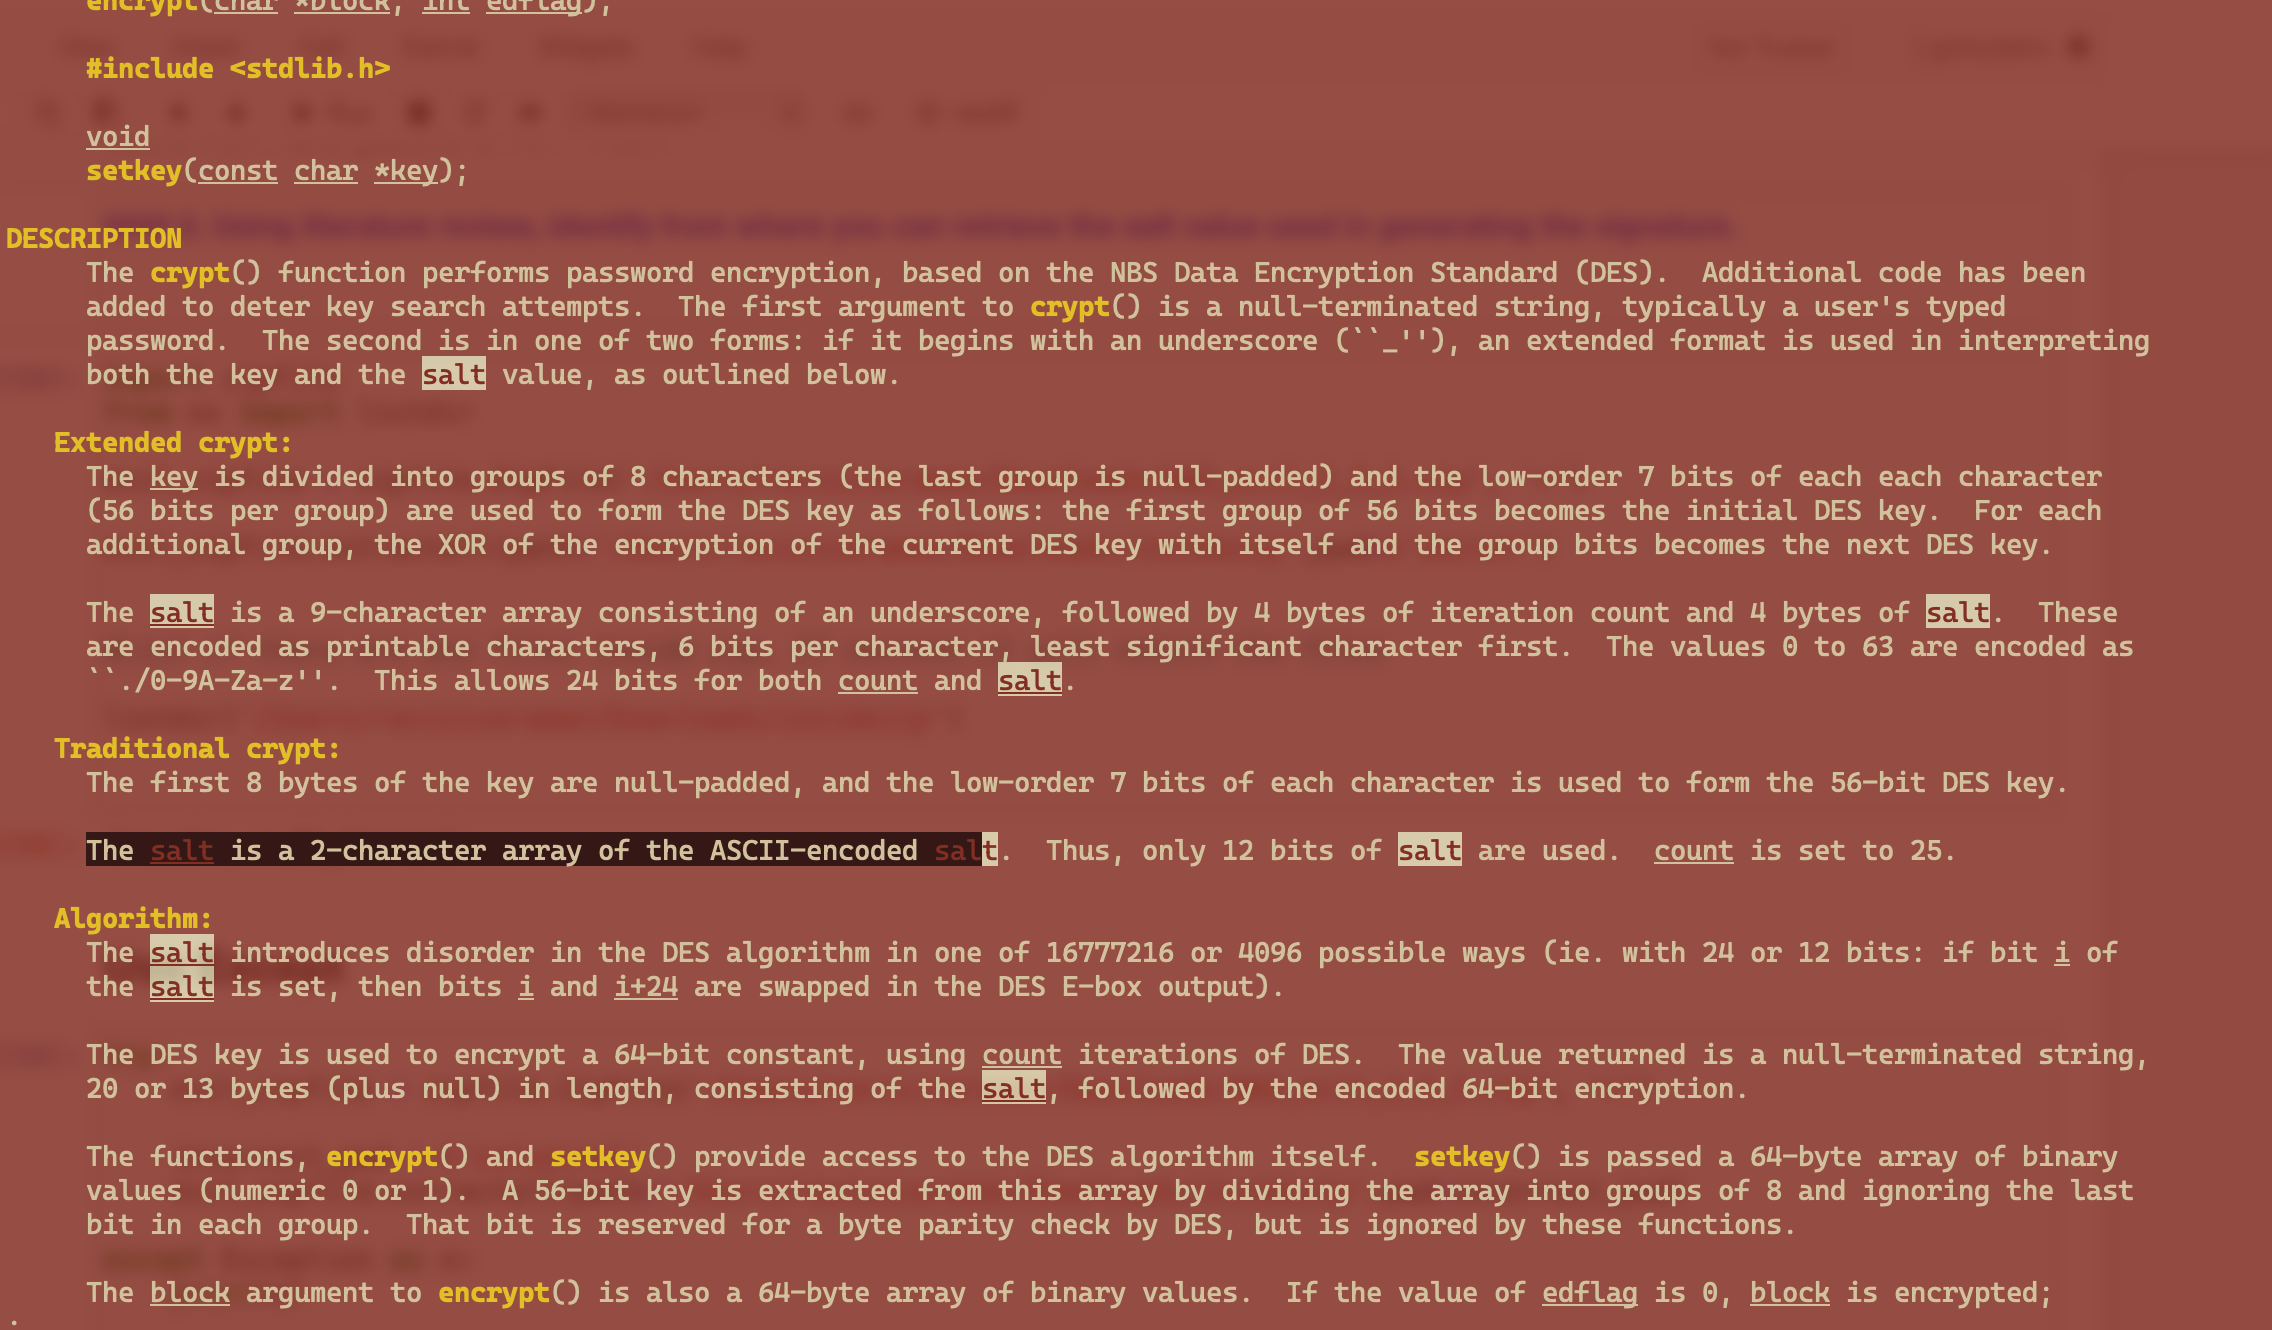

## Exercise 2 : Zip File Password Cracker

The goal of this exercise is to write a zip file extractor and password cracker. For this exercise, we will use the zipfile library. You may view information about the zipfile library in Python 2.79 by issuing the command help(‘zipfile’) to learn more about the library. Pay close attention to the extractall( ) method. You may use this method to extract the contents from a zip file.



#### 1. Write a quick script to test the use of the zipfile library. After importing the library, instantiate a new ZipFile class by specifying the filename of the password-protected zip file (evil.zip). utilize the extractall( ) method and specify the optional parameter for the password (secret). Execute your script and turn in the code and output.

In [2]:
import zipfile
from os import listdir

evil_zipfile = zipfile.ZipFile('/Users/ravisivaraman/Downloads/HW3_evil_2_2_2.zip', 'r')

evil_zipfile.extractall(path='/Users/ravisivaraman/Downloads/insidezip',pwd=b'secret')


#List if there are any files inside zip. If success it will return the files

listdir('/Users/ravisivaraman/Downloads/insidezip')



['evil', '.DS_Store']

#### 2. Use the except Exception exception handler to catch exceptions and print them out when an incorrect password is used. Execute your script with an incorrect password and exception handler and turn in the code and output.

In [3]:
try:
    evil_zipfile = zipfile.ZipFile('/Users/ravisivaraman/Downloads/HW3_evil_2_2_2.zip', 'r')
    
    incorrect_pwd = b'notsecret'
    evil_zipfile.extractall(path='/Users/ravisivaraman/Downloads/insidezip',pwd=incorrect_pwd)
    
except Exception as e:
    print(e)



Bad password for file <ZipInfo filename='evil/note_to_adam.txt' compress_type=deflate filemode='-rw-r--r--' file_size=171 compress_size=156>


#### 3. Write a script that performs a dictionary attack on the password protected zip file. Execute your script and turn in the code and output. Be sure to provide user feedback on exceptions thrown.


Found password for this file is: secret


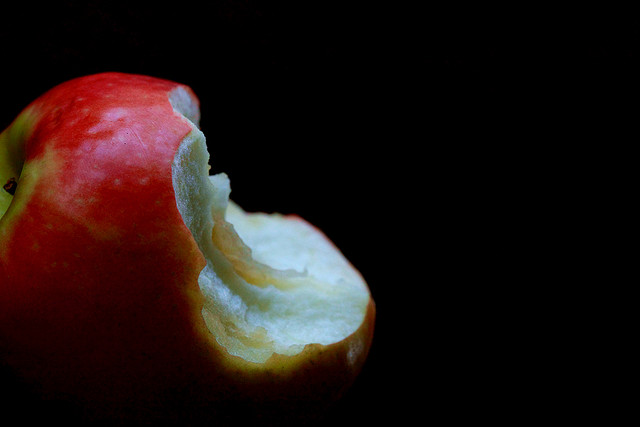

In [6]:
from IPython.display import display, Image

## Dictionary Attack on Zip File

evil_zipfile = zipfile.ZipFile('/Users/ravisivaraman/Downloads/HW3_evil_2_2_2.zip', 'r')

#Read dictionary and check if any password matches
dict_file = open('/Users/ravisivaraman/Downloads/HW3dictionary.txt', 'r')
dict_words = dict_file.readlines()

for dict_word in dict_words:
    try:
        dict_word = dict_word.rstrip()
        evil_zipfile.extractall(path='/Users/ravisivaraman/Downloads/insidezip',pwd=str.encode(dict_word))
        print("Found password for this file is:", dict_word)
        #display the image
        display(Image(filename='/Users/ravisivaraman/Downloads/insidezip/evil/evil.jpg'))

    except Exception as e:
        #This is not the password
        continue
        

### Exercise 3 : Port Scanner

The goal of this exercise is to learn about port scanners for networked systems.
First, create a simple Python-based port scanner. 

Using the socket library, you will create a script that iterates through a range of IP addresses, and, for each IP address, will identify the active ports available for that IP address. At least ports corresponding to telnet, ftp SSH, smtp, http, imap, and https services should be scanned and identified.

In [ ]:
import socket
import ipaddress
sock = socket.socket(socket.AF_INET,socket.SOCK_STREAM )

myip_range = "127.0.0.0/24" 

for ip in ipaddress.IPv4Network(myip_range):
    for port in range(1,9999):
        try:
            #addr = (ip, port)
            ipaddr = format(ipaddress.IPv4Address(ip))
            addr = (ipaddr, port)
            conn = socket.create_connection(addr, timeout=1)
            print("Open port-->", ip, port)
        except:
            continue
    


Open port--> 127.0.0.1 88
Open port--> 127.0.0.1 445
Open port--> 127.0.0.1 3306
Open port--> 127.0.0.1 5055
Open port--> 127.0.0.1 7778
Open port--> 127.0.0.1 8888


#### Second, download and install the nmap port scanning software from nmap.org. Utilize nmap to identify the operating system and the open ports of devices on a range of IP addresses.

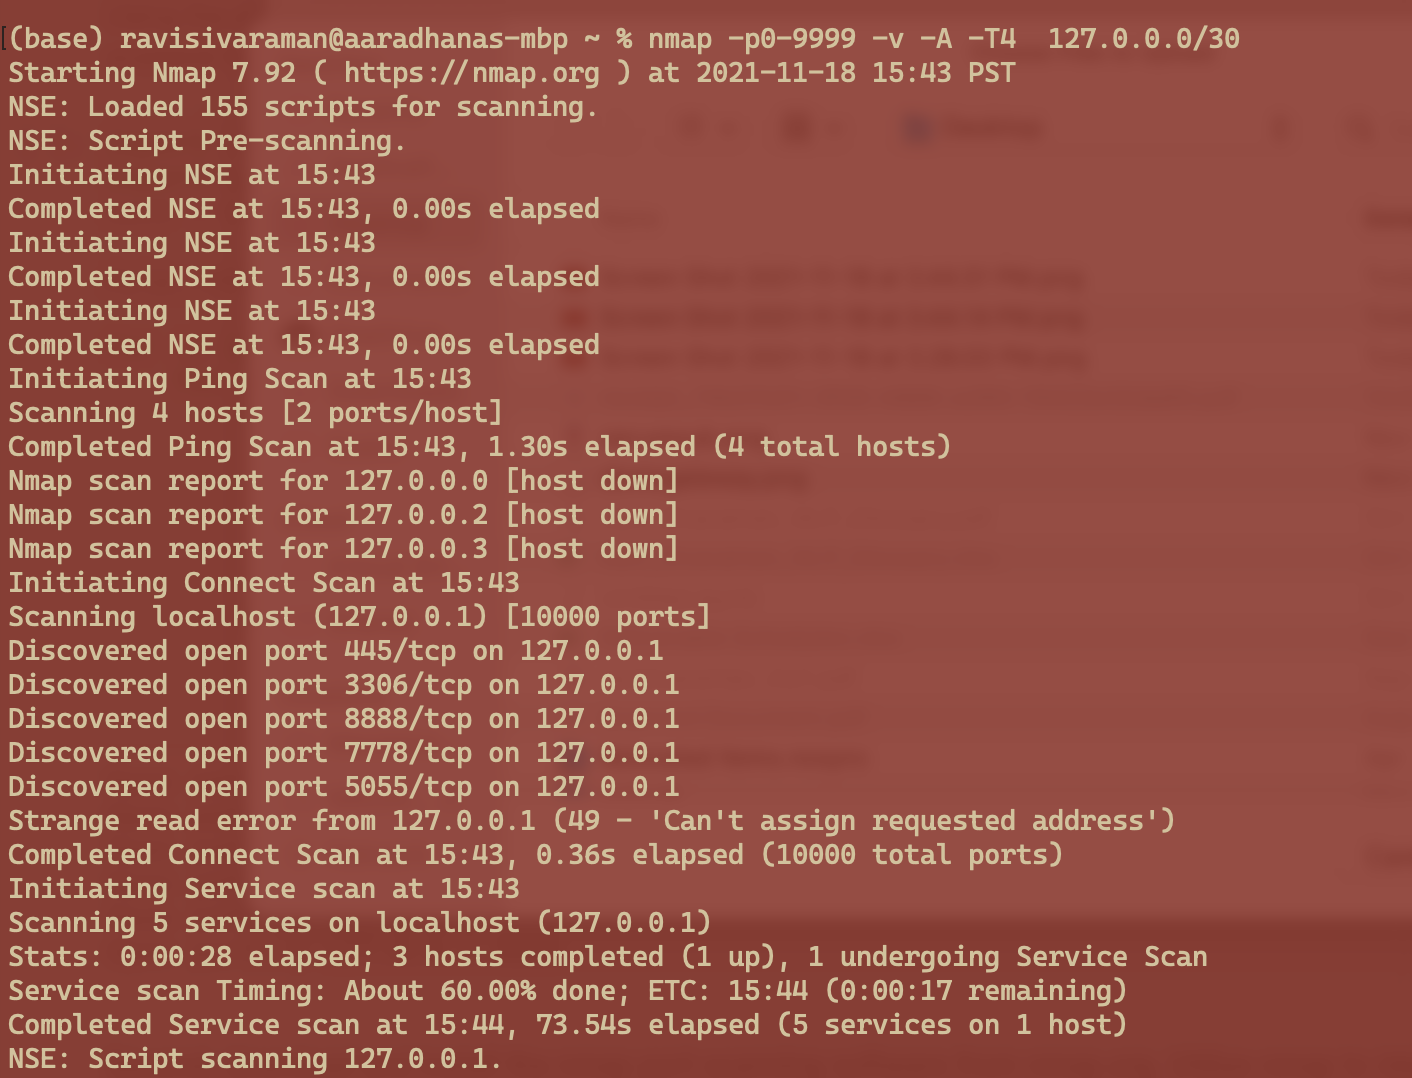

### The python script above and the nmap scanned the same ports and ip for the range 127.0.0.1/30